In [ ]:
# imports

import re
import logging
import pandas as pd
import numpy as np
import seaborn as sb
from numpy import random

In [ ]:
# uploading joined dataset

data = pd.read_csv(r'C:\Users\user\Documents\HSE\jupyters\DAML_lab\data_lab_1.csv', delimiter=';')
data.head(120)

title  \
0    As U.S. budget fight looms, Republicans flip t...   
1    U.S. military to accept transgender recruits o...   
2    Senior U.S. Republican senator: 'Let Mr. Muell...   
3    FBI Russia probe helped by Australian diplomat...   
4    Trump wants Postal Service to charge 'much mor...   
..                                                 ...   
115  Republican Senator John McCain leaves Washingt...   
116  Trump says not considering firing U.S. special...   
117  Trump allies say Mueller unlawfully obtained t...   
118  Senator-elect Jones not joining calls for Trum...   
119  Trump administration bans selected words at he...   

                                                  text       subject  \
0    WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1    WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2    WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3    WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4    SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
..                                                 ...           ...   
115  WASHINGTON (Reuters) - Republican U.S. Senator...  politicsNews   
116  WASHINGTON (Reuters) - President Donald Trump,...  politicsNews   
117  WASHINGTON (Reuters) - An organization establi...  politicsNews   
118  WASHINGTON (Reuters) - Democrat Doug Jones, wh...  politicsNews   
119  WASHINGTON (Reuters) - The Trump administratio...  politicsNews   

                   date label  
0    December 31, 2017   true  
1    December 29, 2017   true  
2    December 31, 2017   true  
3    December 30, 2017   true  
4    December 29, 2017   true  
..                  ...   ...  
115  December 18, 2017   true  
116  December 17, 2017   true  
117  December 16, 2017   true  
118  December 17, 2017   true  
119  December 17, 2017   true  

[120 rows x 5 columns]

# EDA

In [ ]:
# describing data

data.describe(include='all')

title   text  \
count                                               44898  44898   
unique                                              38729  38646   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   

             subject                date  label  
count          44898               44898  44898  
unique             8                2397      2  
top     politicsNews  December 20, 2017    fake  
freq           11272                 182  23481

Results:
- 44898 objects total
- 38646 unique objects
- 2 unique labels
- 8 unique subjects
- fake: is the most common label

Other info seems not to be essential.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


We can see that there are no None-s in dataset. Data type is always 'object'.

## Categorical variables

Do something with dates.
We can leave only month: like int-number. Probably it will help somehow when classifying.

[January-December] = [0,11]

In [ ]:
data['date'] = data['date'].astype(str).replace([
    'Jan.+', 'Feb.+', 'Mar.+', 'Apr.+', 'May.+', 'Jun.+', 
    'Jul.+', 'Aug.+', 'Sep.+', 'Oct.+', 'Nov.+', 'Dec.+'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], regex=True)

In [ ]:
data = data.rename({"date": "month"}, axis=1)
data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject month  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews    11   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews    11   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews    11   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews    11   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews    11   
...                                                  ...           ...   ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east     0   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east     0   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east     0   
44896  21st Century Wire says Al Jazeera America will...   Middle-east     0   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east     0   

      label  
0      true  
1      true  
2      true  
3      true  
4      true  
...     ...  
44893  fake  
44894  fake  
44895  fake  
44896  fake  
44897  fake  

[44898 rows x 5 columns]

To prepare our dataset we will also convert categorical columns.

In [ ]:
# get list of unique values in 'subject' column
set(data.subject)

{'Government News',
 'Middle-east',
 'News',
 'US_News',
 'left-news',
 'politics',
 'politicsNews',
 'worldnews'}

In [ ]:
# get list of unique values in 'label' column
set(data.label)

{'fake', 'true'}

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['subject'] = LE.fit_transform(data['subject'])
data['label'] = LE.fit_transform(data['label'])

data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  subject month  label  
0      WASHINGTON (Reuters) - The head of a conservat...        6    11      1  
1      WASHINGTON (Reuters) - Transgender people will...        6    11      1  
2      WASHINGTON (Reuters) - The special counsel inv...        6    11      1  
3      WASHINGTON (Reuters) - Trump campaign adviser ...        6    11      1  
4      SEATTLE/WASHINGTON (Reuters) - President Donal...        6    11      1  
...                                                  ...      ...   ...    ...  
44893  21st Century Wire says As 21WIRE reported earl...        1     0      0  
44894  21st Century Wire says It s a familiar theme. ...        1     0      0  
44895  Patrick Henningsen  21st Century WireRemember ...        1     0      0  
44896  21st Century Wire says Al Jazeera America will...        1     0      0  
44897  21st Century Wire says As 21WIRE predicted in ...        1     0      0  

[44898 rows x 5 columns]

Now we have:
    - 1: true, 0: fake
    - 0: Government News, 1: Middle-east, 2: News, 3: US_News,
        4: left-news, 5: politics, 6: politicsNews, 7: worldnews

And finally: make 'month" integer.

In [ ]:
set(data.month)

{0,
 1,
 10,
 11,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 'MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]',
 'https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/',
 'https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/',
 'https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg',
 'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg'}

We see that under the correct numbers there are litter. Clean it.

In [ ]:
print(data[data['month']=='MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]'].index.values)
print(data[data['month']=='https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/'].index.values)
print(data[data['month']=='https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/'].index.values)
print(data[data['month']=='https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/'].index.values)
print(data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'].index.values)
print(data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg'].index.values)

[40350]
[36925]
[30775]
[36924]
[37257 38850 43287]
[37256 38849 43286]


In [ ]:
data = data.drop([40350, 36925, 30775, 36924, 37257])
data = data.drop([38850, 43287, 37256, 38849, 43286])

In [ ]:
set(data.month)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

It is clear now!

## Statistics and Vizualizations

Look at stats again.

In [ ]:
data.describe(include='all')

title   text  \
count                                               44888  44888   
unique                                              38723  38640   
top     Factbox: Trump fills top jobs for his administ...          
freq                                                   14    627   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

             subject    month         label  
count   44888.000000  44888.0  44888.000000  
unique           NaN     12.0           NaN  
top              NaN     10.0           NaN  
freq             NaN   5536.0           NaN  
mean        4.720148      NaN      0.477121  
std         2.052090      NaN      0.499482  
min         0.000000      NaN      0.000000  
25%         2.000000      NaN      0.000000  
50%         5.000000      NaN      0.000000  
75%         6.000000      NaN      1.000000  
max         7.000000      NaN      1.000000

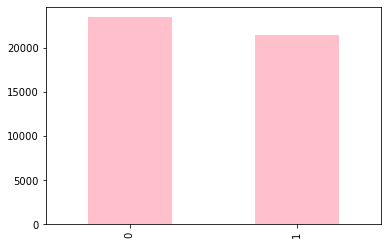

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# distribution by label

labels = [0, 1]
plt.figure(figsize=(6,4))
data.label.value_counts().plot(kind='bar', color='pink')

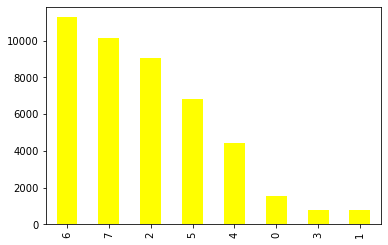

In [ ]:
# distribution by subject

subjects = [0, 1, 2, 3, 4, 5]
plt.figure(figsize=(6,4))
data.subject.value_counts().plot(kind='bar', color='yellow')

# Preprocessing

## Normalization, tokenization, stopwords

In [ ]:
import string
import re
import nltk
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# remove urls, handles, and the hashtag from hashtags
# (taken from https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression)
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [ ]:
prepro_text = [] # our preprocessed text column
for text_data in data['text']:
    prepro = preprocessing(text_data)
    prepro_text.append(prepro)
data['prepro_text'] = prepro_text # add the preprocessed text as a column

In [ ]:
prepro_title = [] # our preprocessed text column
for text_data in data['title']:
    prepro = preprocessing(text_data)
    prepro_title.append(prepro)
data['prepro_title'] = prepro_title # add the preprocessed text as a column

In [ ]:
data

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  subject month  \
0      WASHINGTON (Reuters) - The head of a conservat...        6    11   
1      WASHINGTON (Reuters) - Transgender people will...        6    11   
2      WASHINGTON (Reuters) - The special counsel inv...        6    11   
3      WASHINGTON (Reuters) - Trump campaign adviser ...        6    11   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...        6    11   
...                                                  ...      ...   ...   
44893  21st Century Wire says As 21WIRE reported earl...        1     0   
44894  21st Century Wire says It s a familiar theme. ...        1     0   
44895  Patrick Henningsen  21st Century WireRemember ...        1     0   
44896  21st Century Wire says Al Jazeera America will...        1     0   
44897  21st Century Wire says As 21WIRE predicted in ...        1     0   

       label                                        prepro_text  \
0          1  washington reuters head conservative republica...   
1          1  washington reuters transgender people allowed ...   
2          1  washington reuters special counsel investigati...   
3          1  washington reuters trump campaign adviser geor...   
4          1  seattle washington reuters president donald tr...   
...      ...                                                ...   
44893      0  st century wire say wire reported earlier week...   
44894      0  st century wire say familiar theme whenever di...   
44895      0  patrick henningsen st century wireremember oba...   
44896      0  st century wire say al jazeera america go hist...   
44897      0  st century wire say wire predicted new year lo...   

                                            prepro_title  
0      u budget fight loom republican flip fiscal script  
1      u military accept transgender recruit monday p...  
2         senior u republican senator let mr mueller job  
3      fbi russia probe helped australian diplomat ti...  
4      trump want postal service charge much amazon s...  
...                                                  ...  
44893  mcpain john mccain furious iran treated u sail...  
44894  justice yahoo settle e mail privacy class acti...  
44895  sunnistan u allied safe zone plan take territo...  
44896  blow million al jazeera america finally call q...  
44897  u navy sailor held iranian military sign neoco...  

[44888 rows x 7 columns]

## Vectorization

In [ ]:
from sklearn.model_selection import train_test_split

X = data.prepro_text
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31421,), (13467,), (31421,), (13467,))

In [ ]:
X_train

41028    trump made clear sanctuary city could lose fed...
14642    stockholm reuters man found dead thursday flat...
42721    republican party really cared winning race can...
27508    last weekend news feed everywhere filled horri...
2642     washington reuters u house speaker paul ryan s...
                               ...                        
11415    vatican city reuters pope francis strongly def...
14173    ankara reuters turkey expects receive first ru...
19136    sulaimaniya iraq reuters kurdish leader descri...
22625    donald trump bigoted attack london mayor backf...
3729     washington reuters justice department decision...
Name: prepro_text, Length: 31421, dtype: object

In [ ]:
X_test

40022    punishing rich hard working white american one...
24712    rachel maddow pounded kellyanne conway donald ...
40936    smith fly three flag front house american flag...
20068    erbil reuters brett mcgurk u special envoy coa...
6353     washington reuters republican lawmaker begin v...
                               ...                        
13270    dubai reuters yemen houthi group fired cruise ...
12899    jerusalem ramallah reuters israel hailed u pre...
5710     washington reuters u secretary state rex tille...
41699    karma beautiful thing massive makeshift refuge...
32781    judge refused toss federal lawsuit city san jo...
Name: prepro_text, Length: 13467, dtype: object

### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(lowercase=False) # do not make lower, because it has been already done

X_train_vector_cv = CV.fit_transform(X_train.values)
X_test_vector_cv = CV.transform(X_test.values)

X_train_vector_cv.shape, X_test_vector_cv.shape

((31421, 83771), (13467, 83771))

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

TI = TfidfVectorizer()
X_train_vector_ti = TI.fit_transform(X_train.values)
X_test_vector_ti = TI.transform(X_test.values)

X_train_vector_ti.shape, X_test_vector_ti.shape

((31421, 83771), (13467, 83771))

### W2V

In [ ]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

word2vec_text8 = api.load('text8')

also possible to download:
- text8 !download <1min
- fake_news
- 20-newsgroups
- word2vec-google-news-300 !download done in 25 min

In [ ]:
model = Word2Vec(word2vec_text8, size=100, window=5, min_count=1, workers=4)
word_vectors = model.wv

In [ ]:
word_vectors.get_vector('news')

array([ 0.786712  ,  0.00814822,  1.7143896 , -3.2562375 ,  0.4397331 ,
       -3.4676497 ,  3.7984147 ,  3.6814585 ,  1.0029384 , -0.22219801,
        0.19188786,  0.3545758 ,  0.2049486 ,  3.675234  , -0.9352901 ,
        2.0473723 , -1.2383927 , -0.52771527,  1.1313459 , -1.5102041 ,
       -0.11111099, -0.28091377,  3.044794  ,  1.7090572 , -0.9021229 ,
       -0.39104852, -1.182091  , -0.5316635 ,  0.11445952, -0.54914623,
        3.083169  , -1.0950882 ,  0.8673095 , -3.207025  , -3.9951406 ,
        0.4660799 , -0.6631928 , -0.30084592, -1.8725284 , -0.05725246,
       -0.28945747, -0.04561321, -3.4154909 , -0.50290424, -0.747789  ,
        2.1330686 ,  0.20985682, -1.1826186 , -1.4372517 ,  2.2959757 ,
        1.0864689 , -1.1914175 , -0.00656288,  0.6832495 ,  1.8254302 ,
        1.4718977 ,  1.1852838 ,  1.8410758 , -3.1931024 ,  1.4150283 ,
       -1.108428  ,  1.5829189 ,  1.5794476 , -0.89858496, -1.7699827 ,
       -0.23063335, -0.21213984,  1.5166667 ,  0.85292125,  1.74

In [ ]:
word_vectors.get_vector(data.prepro_text.values)

TypeError: unhashable type: 'numpy.ndarray'

## Choosing the best vectorizer

Classify texts with the help of logistic regression and see which type of vectorization provides the most appropriate results.

In [ ]:
from sklearn.linear_model import LogisticRegression

**1. For CountVectorizer**

In [ ]:
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train_vector_cv, y_train)

print(
    classification_report(y_test, lr.predict(X_test_vector_cv))
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7039
           1       0.99      1.00      1.00      6428

    accuracy                           1.00     13467
   macro avg       1.00      1.00      1.00     13467
weighted avg       1.00      1.00      1.00     13467



c:\users\user\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**2. For TF-IDF Vectorizer**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vector_ti, y_train)

print(
    classification_report(y_test, lr.predict(X_test_vector_ti))
)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7039
           1       0.98      0.99      0.98      6428

    accuracy                           0.98     13467
   macro avg       0.98      0.98      0.98     13467
weighted avg       0.98      0.98      0.98     13467



**3. For w2v: did not succeed**

## The best vectorizer is...

**TF-iDF**. Why? It seems to be that CountVectorizer provided higher numbers in results. However, the dataset itself is quite complicated: true-news and fake-news are similar, e.g. the same words are used in both parts of dataframe. That is the reason why CountVectorizer with the simple frequency approach does not match: it becomes overfitted and shows too optimistic results.

# Classification

Different classification methods with hyperparameters identifying.

## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
tuned_parameters = [{'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                     'penalty': ['l1', 'l2', 'elasticnet', 'none']}
                    ]

clf = GridSearchCV(
    lr, 
    tuned_parameters,  
    verbose=1, 
    n_jobs=-1)

In [ ]:
clf.fit(X_train_vector_ti, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
clf.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
clf.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr = LogisticRegression(C=100.0, penalty='l2')
lr.fit(X_train_vector_ti, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(
    classification_report(y_test, lr.predict(X_test_vector_ti))
)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7039
           1       0.99      0.99      0.99      6428

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_params = {'max_depth': range(1,5),
'max_leaf_nodes': range(3,8)}

In [ ]:
tree_grid = GridSearchCV(tree_clf, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [ ]:
tree_grid.fit(X_train_vector_ti, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'max

In [ ]:
tree_grid.best_params_

{'max_depth': 4, 'max_leaf_nodes': 7}

In [ ]:
tree_grid.best_score_

0.9941440498453726

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7)

In [ ]:
tree_clf.fit(X_train_vector_ti, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(
    classification_report(y_test, tree_clf.predict(X_test_vector_ti))
)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7039
           1       0.99      1.00      0.99      6428

    accuracy                           0.99     13467
   macro avg       0.99      1.00      0.99     13467
weighted avg       0.99      0.99      0.99     13467



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,5),
'max_leaf_nodes': range(3,8), 'min_samples_split': range(2,5), 'criterion': ['gini', 'entropy']}

tree_grid = GridSearchCV(rnd_clf, tree_params,
cv=3, n_jobs=-1,
verbose=True)

In [ ]:
tree_grid.fit(X_train_vector_ti, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  9.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_split': 4}

In [ ]:
rnd_clf = RandomForestClassifier(max_depth=4, max_leaf_nodes=6, min_samples_split=4, criterion='entropy')

In [ ]:
rnd_clf.fit(X_train_vector_ti, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=6, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(
    classification_report(y_test, rnd_clf.predict(X_test_vector_ti))
)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7039
           1       0.99      0.89      0.94      6428

    accuracy                           0.94     13467
   macro avg       0.95      0.94      0.94     13467
weighted avg       0.94      0.94      0.94     13467



## SVM

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC()

svc_params = {'C': [1,5], 'degree': range(1,5), 'max_iter': range(10,20), 'kernel': ['linear', 'poly']}

svc_grid = GridSearchCV(svc_clf, svc_params,
cv=3, n_jobs=-1,
verbose=True)

In [ ]:
svc_grid.fit(X_train_vector_ti, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  9.1min finished
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5], 'degree': range(1, 5),
                         'kernel': ['linear', 'poly'],
                         'max_iter': range(10, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [ ]:
svc_grid.best_params_

{'C': 1, 'degree': 1, 'kernel': 'linear', 'max_iter': 18}

In [ ]:
svc_clf = SVC(C=1, degree=1, kernel='linear', max_iter=18)

In [ ]:
svc_clf.fit(X_train_vector_ti, y_train)

c:\users\user\miniconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=18).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='linear',
    max_iter=18, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(
    classification_report(y_test, svc_clf.predict(X_test_vector_ti))
)

              precision    recall  f1-score   support

           0       0.64      0.96      0.77      7039
           1       0.91      0.40      0.55      6428

    accuracy                           0.69     13467
   macro avg       0.77      0.68      0.66     13467
weighted avg       0.77      0.69      0.67     13467



**Conclusion**

We cannot choose definately, which one of the classifiers is the best.
Let's discuss.
Firtly, define the most representative metric. We will prefer **macro-averaging** of f1-score because of relatively balanced corpus.

The SVC method gave too low results (0.66) to call it the best.
Random forest classifier worked much better (0.94).
Decision tree classifier had 0.99. It is suspicious, because some metrics got 1.00, therefore overfitting is probable. The same with logistic regression: it reached 0.99 of quality by macro-averaging f1-score and is close to overfitting.

Under these conditions, the most effective classifier is **random forest classifier**.

# Feature Significance

It is possible to provide feature significance for only two models: logistic regression and random forest.

In [ ]:
lr.coef_[:10]

array([[ 1.36606666e-01, -1.13344485e+00, -1.20760029e-04, ...,
        -1.95165072e-03, -3.58734313e-04, -8.25289086e-06]])

In [ ]:
max(lr.coef_)

array([ 1.36606666e-01, -1.13344485e+00, -1.20760029e-04, ...,
       -1.95165072e-03, -3.58734313e-04, -8.25289086e-06])

In [ ]:
rnd_clf.feature_importances_[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
max(rnd_clf.feature_importances_)

0.03659038479917085

**Conclusion**
As to logistic regression, its coefficients are quite small. The greatest set of coefficients gives the same info.
About random forest classifier. The most of coefficients are equal to 0. It is because we have sparse vectors after TF-iDF. The maximum value is about 0.04, also law.

# Visualization

In [ ]:
!pip install bokeh

  Created wheel for bokeh: filename=bokeh-2.0.2-cp37-none-any.whl size=9072548 sha256=14accba7eeb530ac4a87d4674c43ff4dbf35a3a08317e60004a2528a590b67f3
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\a3\5e\7d\49405a043a4714a1b66bb7a16dfe16a1f0db9217baac7c4fe3
Successfully built bokeh


In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [ ]:
!pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.4.4-cp37-none-any.whl size=67905 sha256=3b13ea081d8298fc26b08d1da822bcbe8a30f2d5d9ee9a09ca1d8c65145a8953
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\81\d9\a7\91f374756d0966c04104d388ad3b288f332ba706490e8a0fd4
Successfully built umap-learn


In [ ]:
import umap
from sklearn.preprocessing import StandardScaler

# map word vectors onto 2d plane with TSNE. hint: use verbose=100 to see what it's doing.
# normalize them as just lke with pca
scaler = StandardScaler(with_mean=False)
umap_reducer = umap.UMAP(n_components=2, verbose=100)
word_umap = umap_reducer.fit_transform(X_train_vector_ti)
word_umap = scaler.fit_transform(X_train_vector_ti)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=100)
Construct fuzzy simplicial set
Sun Jun  7 20:53:12 2020 Finding Nearest Neighbors
Sun Jun  7 20:53:12 2020 Building RP forest with 14 trees
Sun Jun  7 20:56:47 2020 NN descent for 15 iterations
	 0  /  15
	 1  /  15
	 2  /  15
	 3  /  15
	 4  /  15
	 5  /  15
Sun Jun  7 21:03:06 2020 Finished Nearest Neighbor Search
Sun Jun  7 21:03:09 2020 Construct embedding
	completed  0  /

In [ ]:
draw_vectors(word_umap[:, 0], word_umap[:, 1], token=data.prepro_text.values)

**P.S.**
Unfortunately, several predictors were not taken into concideration yet. For example, title (it could be concatenated as vector with main text), subject, month. Leave it for the next researches (: